In [1]:
import numpy as np
from matplotlib import pyplot as plt
import glob, sys, pickle, sobol_seq, numpy
from scipy.stats import norm, truncnorm, multivariate_normal
from scipy.special import logsumexp
from tqdm import tqdm
import pandas as pd
import pickle
import seaborn as sns

## noise: weber

In [2]:
file_weber = open('C:/Users/canlab/Desktop/Modelling_Influenca/Results/noise_weber_agentid_0.pkl', 'rb')

In [3]:
weber = pickle.load(file_weber)

In [4]:
param_wb = weber[0] #shape: (2000, 4, 3)
lkd_wb = weber[1]
mrglkd_wb = weber[2] 
inference_validated_wb = weber[3]

In [5]:
file_weber.close()

In [21]:
param_wb.shape

(2000, 4, 3)

In [39]:
param_wb

array([[[0.25      , 0.5       , 0.75      ],
        [0.375     , 0.25      , 1.125     ],
        [0.125     , 0.75      , 0.375     ],
        [0.1875    , 0.375     , 0.9375    ]],

       [[0.25284376, 0.44691914, 0.81062146],
        [0.375     , 0.25      , 1.125     ],
        [0.125     , 0.75      , 0.375     ],
        [0.15680021, 0.41191721, 0.81489374]],

       [[0.25284376, 0.44691914, 0.81062146],
        [0.32082166, 0.27845136, 1.26789546],
        [0.07621878, 0.92096031, 0.36801386],
        [0.15680021, 0.41191721, 0.81489374]],

       ...,

       [[0.08431978, 0.01277594, 0.3076899 ],
        [0.10225444, 0.03778554, 0.23910086],
        [0.05834021, 0.08167789, 0.42731504],
        [0.07903691, 0.03491554, 0.21960871]],

       [[0.08431978, 0.01277594, 0.3076899 ],
        [0.10225444, 0.03778554, 0.23910086],
        [0.05711915, 0.04124743, 0.43240573],
        [0.07903691, 0.03491554, 0.21960871]],

       [[0.08431978, 0.01277594, 0.3076899 ],
        [0.

In [29]:
# create dfs from the chains
for i in range(len(param_wb)):
    # all iterations for one chain
    df= param_wb[:][1]

In [56]:
param_wb[:][:][0]

array([[0.25  , 0.5   , 0.75  ],
       [0.375 , 0.25  , 1.125 ],
       [0.125 , 0.75  , 0.375 ],
       [0.1875, 0.375 , 0.9375]])

In [51]:
df= param_wb[:][7][:]
df

array([[0.22718883, 0.37702408, 0.79182574],
       [0.28411229, 0.11972943, 1.19287251],
       [0.01595447, 0.99962977, 0.57259622],
       [0.1626999 , 0.42266404, 0.58229994]])

In [53]:
param_wb[0][0].shape

(3,)

Create 4 nested dictionary for the 4 chains
{1: {alpha: , beta: , zeta: }
 2: ...}

In [6]:
#create df containing all chains for fitting alpha
dic_chain1={}
dic_chain2={}
dic_chain3={}
dic_chain4={}

for i in range(2000):
    dic_chain1[i]=param_wb[i][0][0]
    dic_chain2[i]=param_wb[i][1][0]
    dic_chain3[i]=param_wb[i][2][0]
    dic_chain4[i]=param_wb[i][3][0]
    
df_c1=pd.DataFrame.from_dict(dic_chain1, orient='index')
print(df_c1.mean())
df_c2=pd.DataFrame.from_dict(dic_chain2, orient='index')
df_c3=pd.DataFrame.from_dict(dic_chain3, orient='index')
df_c4=pd.DataFrame.from_dict(dic_chain4, orient='index')
df_alpha=pd.concat([df_c1, df_c2, df_c3, df_c4], axis=1)
print(df_alpha.mean(axis=0))
df_alpha.reset_index(level=0, inplace=True) 
df_alpha.columns=['iterations', 'chain_1', 'chain_2','chain_3','chain_4']

0    0.09184
dtype: float64
0    0.091840
0    0.092875
0    0.080918
0    0.090065
dtype: float64


In [7]:
df_alpha

iterations   chain_1   chain_2   chain_3   chain_4
0              0  0.250000  0.375000  0.125000  0.187500
1              1  0.252844  0.375000  0.125000  0.156800
2              2  0.252844  0.320822  0.076219  0.156800
3              3  0.242939  0.296850  0.067372  0.156800
4              4  0.242939  0.296850  0.028227  0.156800
...          ...       ...       ...       ...       ...
1995        1995  0.084320  0.107959  0.094192  0.079037
1996        1996  0.084320  0.102254  0.051689  0.079037
1997        1997  0.084320  0.102254  0.058340  0.079037
1998        1998  0.084320  0.102254  0.057119  0.079037
1999        1999  0.084320  0.102254  0.025693  0.079037

[2000 rows x 5 columns]

In [71]:
df_alpha.median()

iterations    999.500000
chain_1         0.094666
chain_2         0.091935
chain_3         0.084142
chain_4         0.088640
dtype: float64

In [8]:
df = df_alpha.melt('iterations', var_name='MCMC chains',  value_name='alpha') # melting for plotting multiple columns


In [9]:
df

iterations MCMC chains     alpha
0              0     chain_1  0.250000
1              1     chain_1  0.252844
2              2     chain_1  0.252844
3              3     chain_1  0.242939
4              4     chain_1  0.242939
...          ...         ...       ...
7995        1995     chain_4  0.079037
7996        1996     chain_4  0.079037
7997        1997     chain_4  0.079037
7998        1998     chain_4  0.079037
7999        1999     chain_4  0.079037

[8000 rows x 3 columns]

<IPython.core.display.Javascript object>


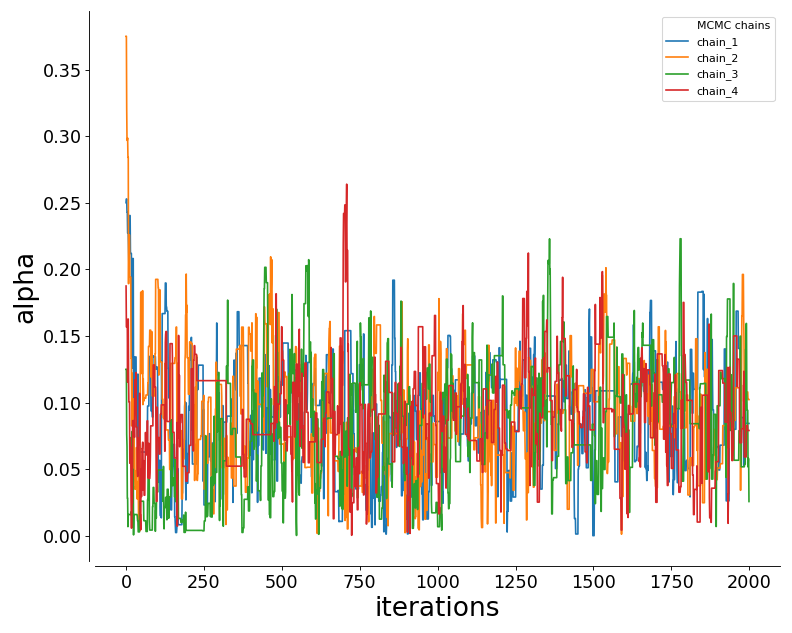

In [124]:
%matplotlib notebook
plt.figure(figsize=(10, 8))
sns.lineplot(data=df, x='iterations', y='alpha', hue='MCMC chains')
sns.despine(top=True,offset=5)
plt.xlabel('iterations', fontsize=24)
plt.ylabel('alpha', fontsize=24)
plt.tick_params(labelsize=16)
sns.despine(top=True,offset=5)
plt.tight_layout()
plt.savefig('C:/Users/canlab/Desktop/Modelling_Influenca/Results/Weber_Alpha', dpi=250)

# Function

In [72]:
# choice: 0: alpha, 1:beta, 2:zeta
def visualize_fitting(param, choice, param_name, path):
    
    
    #create df containing all chains for fitting parameter
    dic_chain1={}
    dic_chain2={}
    dic_chain3={}
    dic_chain4={}

    for i in range(2000):
        dic_chain1[i]=param[i][0][choice]
        dic_chain2[i]=param[i][1][choice]
        dic_chain3[i]=param[i][2][choice]
        dic_chain4[i]=param[i][3][choice]

    df_c1=pd.DataFrame.from_dict(dic_chain1, orient='index')
    df_c2=pd.DataFrame.from_dict(dic_chain2, orient='index')
    df_c3=pd.DataFrame.from_dict(dic_chain3, orient='index')
    df_c4=pd.DataFrame.from_dict(dic_chain4, orient='index')
    df=pd.concat([df_c1, df_c2, df_c3, df_c4], axis=1)
    df.reset_index(level=0, inplace=True) 
    df.columns=['iterations', 'chain_1', 'chain_2','chain_3','chain_4']

    print(df.median())

    df = df.melt('iterations', var_name='MCMC chains',  value_name=param_name) # melting for plotting multiple columns

    
    
    %matplotlib notebook
    plt.figure(figsize=(10, 8))
    sns.lineplot(data=df, x='iterations', y=param_name, hue='MCMC chains')
    sns.despine(top=True,offset=5)
    plt.xlabel('iterations', fontsize=24)
    plt.ylabel(param_name, fontsize=24)
    plt.tick_params(labelsize=16)
    sns.despine(top=True,offset=5)
    plt.tight_layout()
    plt.savefig(path, dpi=250)

In [63]:
# choice: 0: alpha, 1:beta, 2:zeta
def visualize_density(param, choice, param_name, path):
    %matplotlib notebook
    
    
    #create df containing all chains for fitting parameter
    dic_chain1={}
    dic_chain2={}
    dic_chain3={}
    dic_chain4={}

    for i in range(2000):
        dic_chain1[i]=param[i][0][choice]
        dic_chain2[i]=param[i][1][choice]
        dic_chain3[i]=param[i][2][choice]
        dic_chain4[i]=param[i][3][choice]

    df_c1=pd.DataFrame.from_dict(dic_chain1, orient='index')
    df_c2=pd.DataFrame.from_dict(dic_chain2, orient='index')
    df_c3=pd.DataFrame.from_dict(dic_chain3, orient='index')
    df_c4=pd.DataFrame.from_dict(dic_chain4, orient='index')
    df=pd.concat([df_c1, df_c2, df_c3, df_c4], axis=1)
    df.reset_index(level=0, inplace=True) 
    df.columns=['iterations', 'chain_1', 'chain_2','chain_3','chain_4']

    
    # create df containing all chains
    df = df.melt('iterations', var_name='MCMC chains',  value_name=param_name) # melting for plotting multiple columns
    
    
    plt.figure(figsize=(8, 6))
    # List of five airlines to plot
    chains = ['chain_1', 'chain_2', 'chain_3','chain_4']

    # Iterate through the five airlines
    for chain in chains:
        # Subset to the airline
        subset = df[df['MCMC chains'] == chain]

        # Draw the density plot
        sns.distplot(subset[param_name], hist = False, kde = True,
                     kde_kws = {'linewidth': 2},
                     label = chain)

    # Plot formatting
    sns.despine(top=True,offset=5)
    plt.tick_params(labelsize=16)
    #plt.tight_layout()
    plt.legend(title = 'MCMC Chain')
    plt.title(param_name, fontsize=20)
    
    plt.xlabel(' ', fontsize=20)
    
    plt.ylabel('Density', fontsize=20)
    plt.savefig(path, dpi=250)


<IPython.core.display.Javascript object>


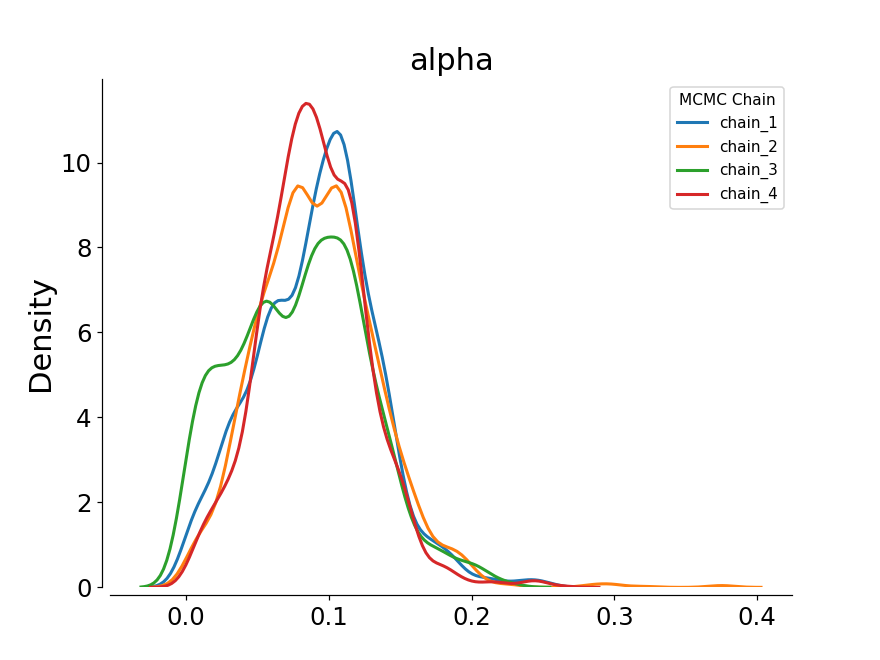

In [73]:
visualize_density(param_wb, 0, 'alpha', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/Weber_alpha_density')

iterations    999.500000
chain_1         0.026400
chain_2         0.028153
chain_3         0.032268
chain_4         0.028140
dtype: float64


<IPython.core.display.Javascript object>


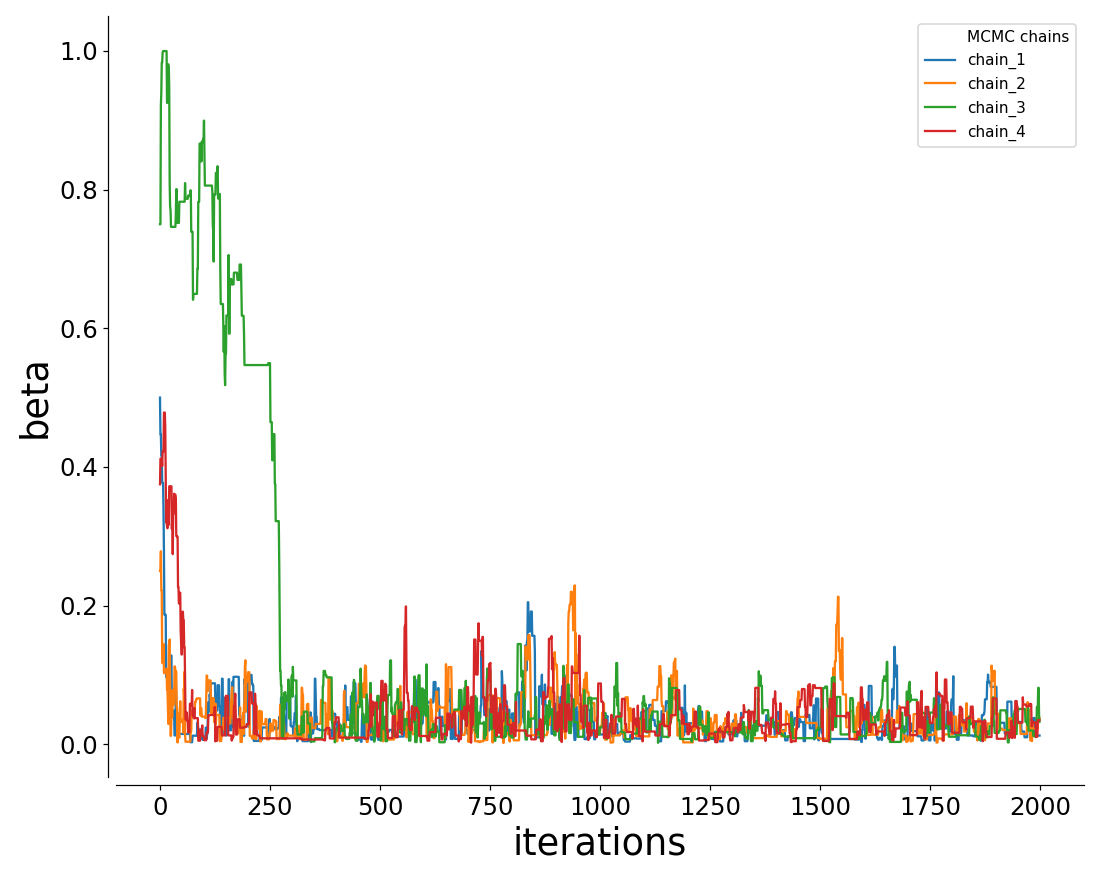

In [74]:
visualize_fitting(param_wb, 1, 'beta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/Weber_beta')

<IPython.core.display.Javascript object>


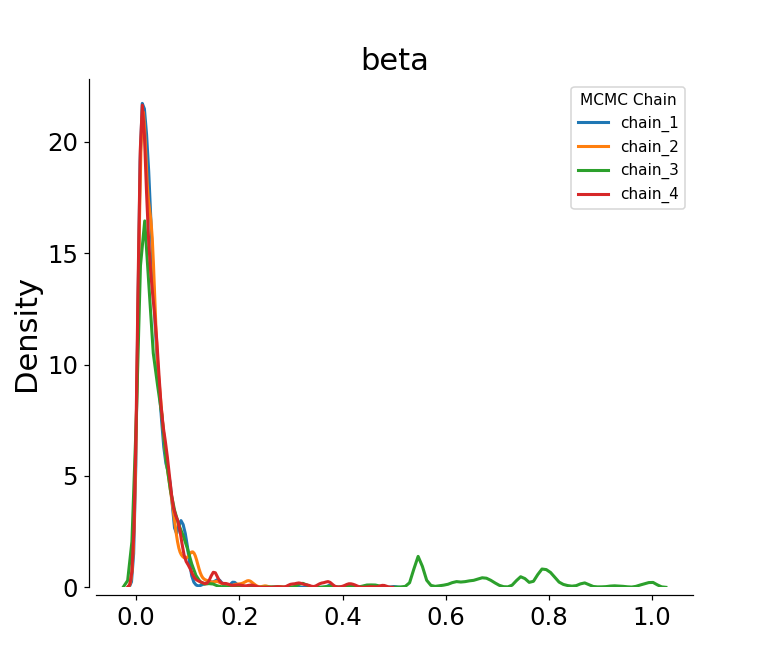

In [54]:
visualize_density(param_wb, 1, 'beta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/Weber_beta_density')

iterations    999.500000
chain_1         0.266708
chain_2         0.260847
chain_3         0.300933
chain_4         0.238379
dtype: float64


<IPython.core.display.Javascript object>


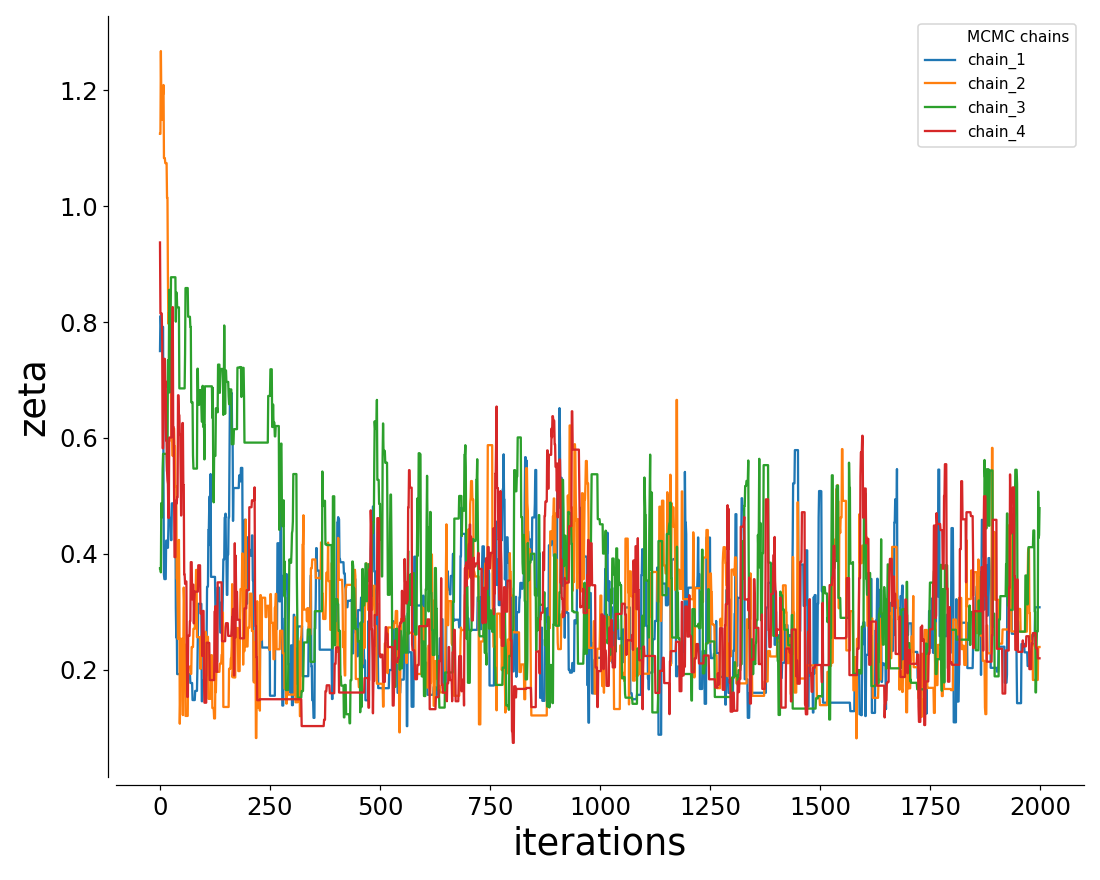

In [75]:
visualize_fitting(param_wb, 2, 'zeta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/Weber_zeta')

<IPython.core.display.Javascript object>


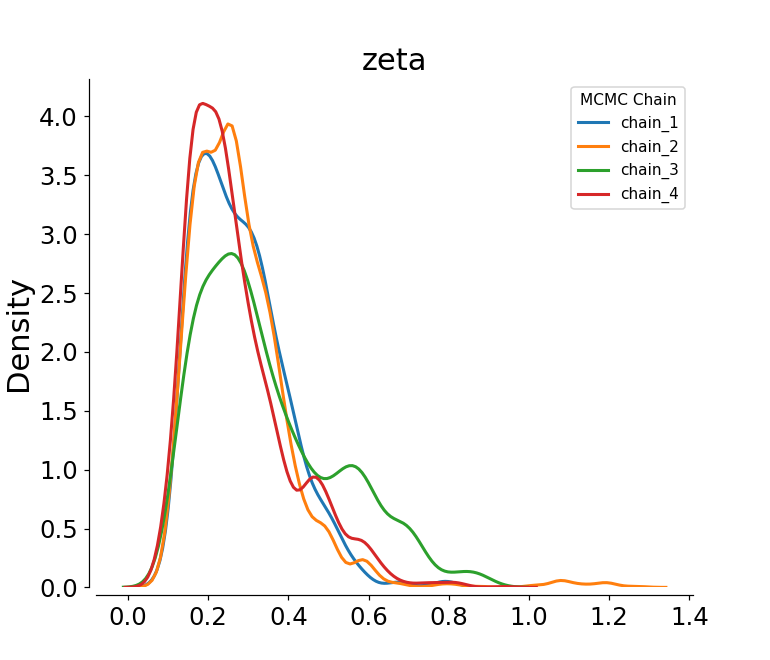

In [53]:
visualize_density(param_wb, 2, 'zeta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/Weber_zeta_density')

## noise: white

In [57]:
file_white = open('C:/Users/canlab/Desktop/Modelling_Influenca/Results/noise_white_agentid_0.pkl', 'rb')
white = pickle.load(file_white)
param_wh = white[0] #shape: (2000, 4, 3)
lkd_wh = white[1]
mrglkd_wh = white[2] 
inference_validated_wh = white[3]
file_white.close()

iterations    999.500000
chain_1         0.286527
chain_2         0.205183
chain_3         0.177355
chain_4         0.188241
dtype: float64


<IPython.core.display.Javascript object>


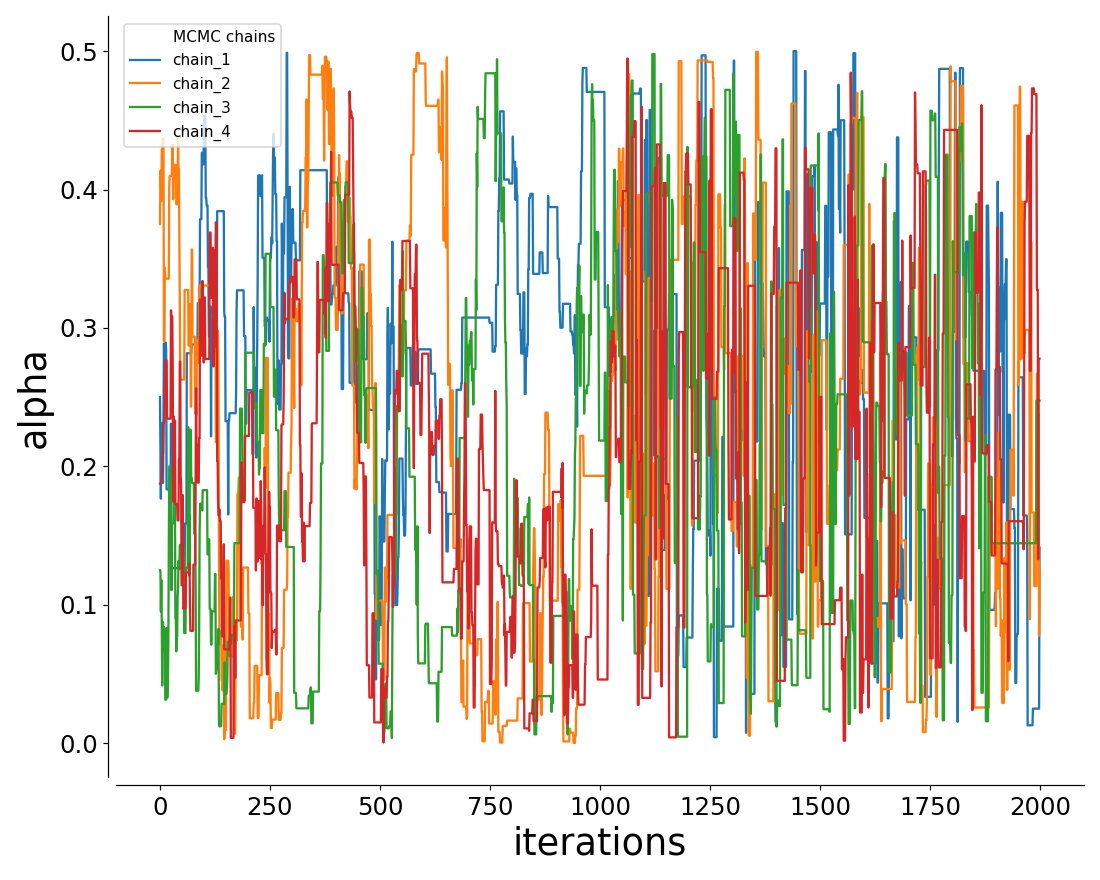

In [76]:
visualize_fitting(param_wh, 0, 'alpha', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/White_alpha')

<IPython.core.display.Javascript object>


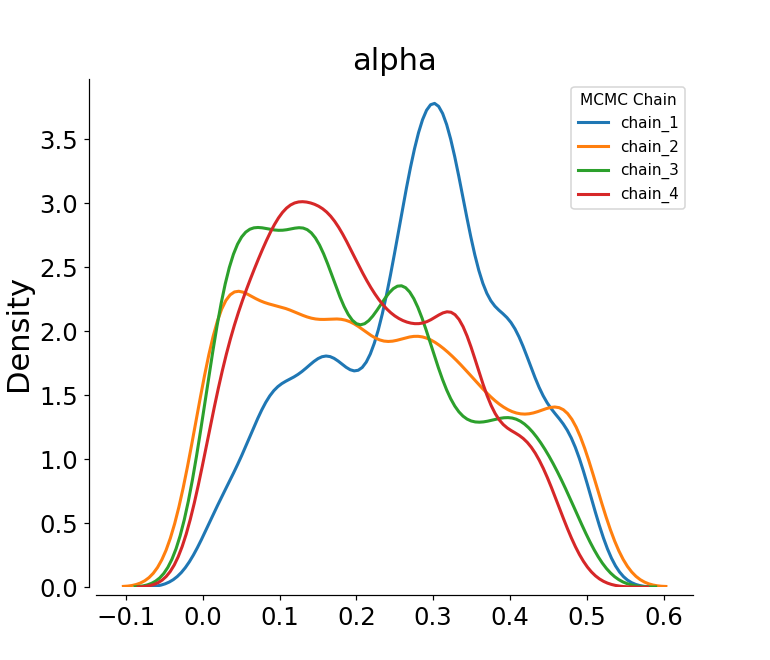

In [58]:
visualize_density(param_wh, 0, 'alpha', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/White_alpha_density')

iterations    999.500000
chain_1         0.100967
chain_2         0.089673
chain_3         0.110039
chain_4         0.088568
dtype: float64


<IPython.core.display.Javascript object>


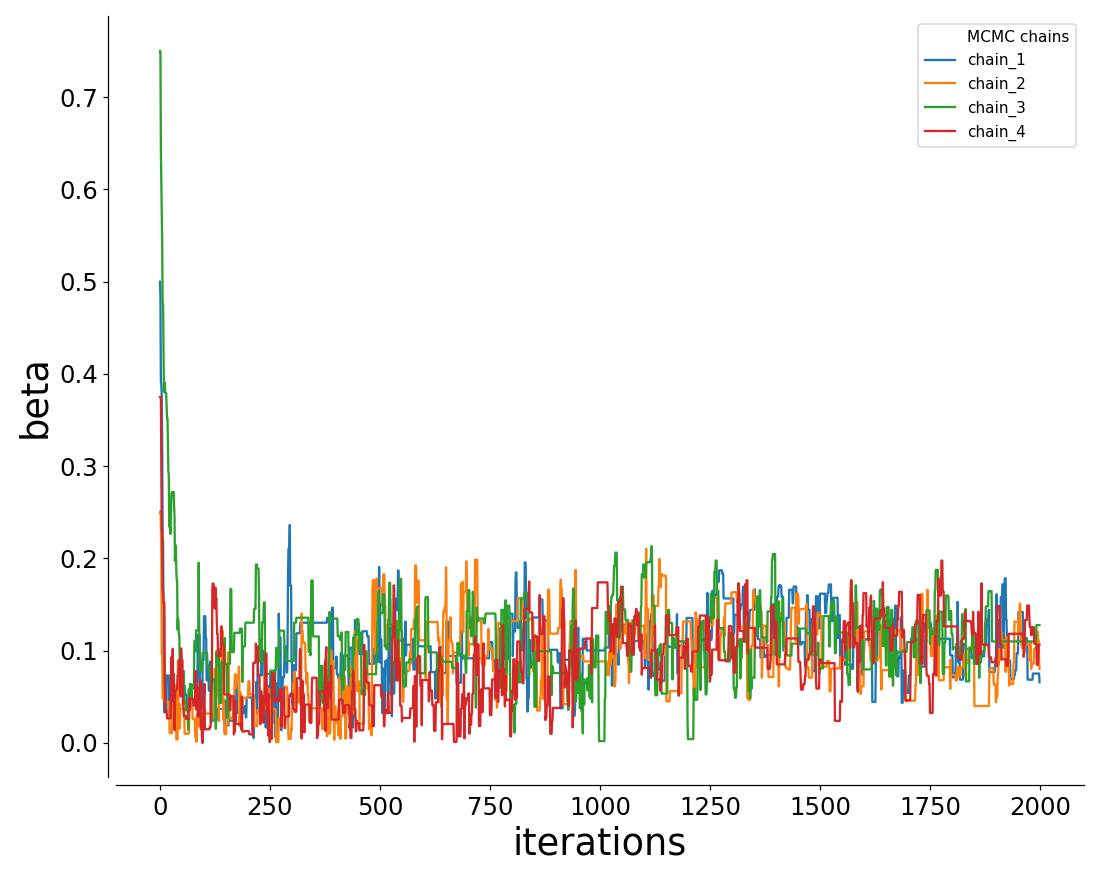

In [77]:
visualize_fitting(param_wh, 1, 'beta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/White_beta')

<IPython.core.display.Javascript object>


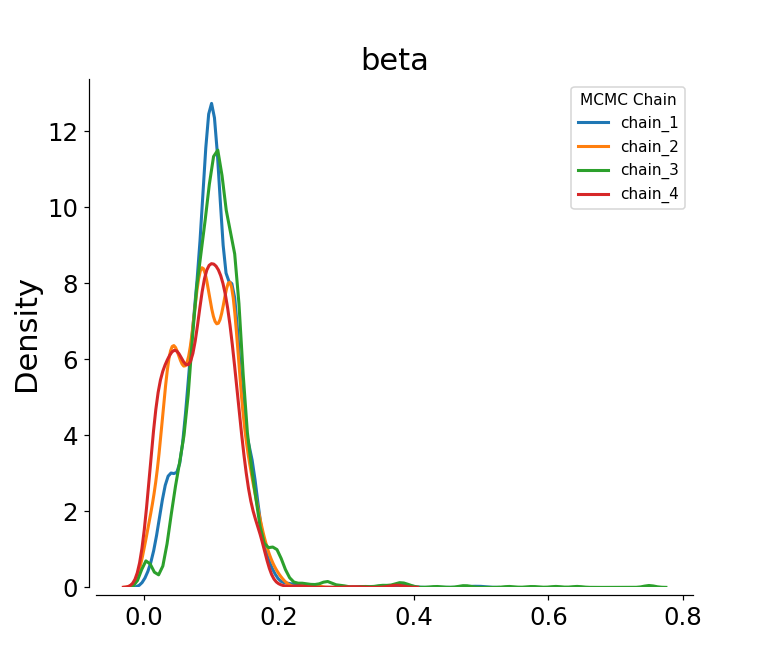

In [59]:
visualize_density(param_wh, 1, 'beta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/White_beta_density')

iterations    999.500000
chain_1         0.022167
chain_2         0.027807
chain_3         0.019759
chain_4         0.035986
dtype: float64


<IPython.core.display.Javascript object>


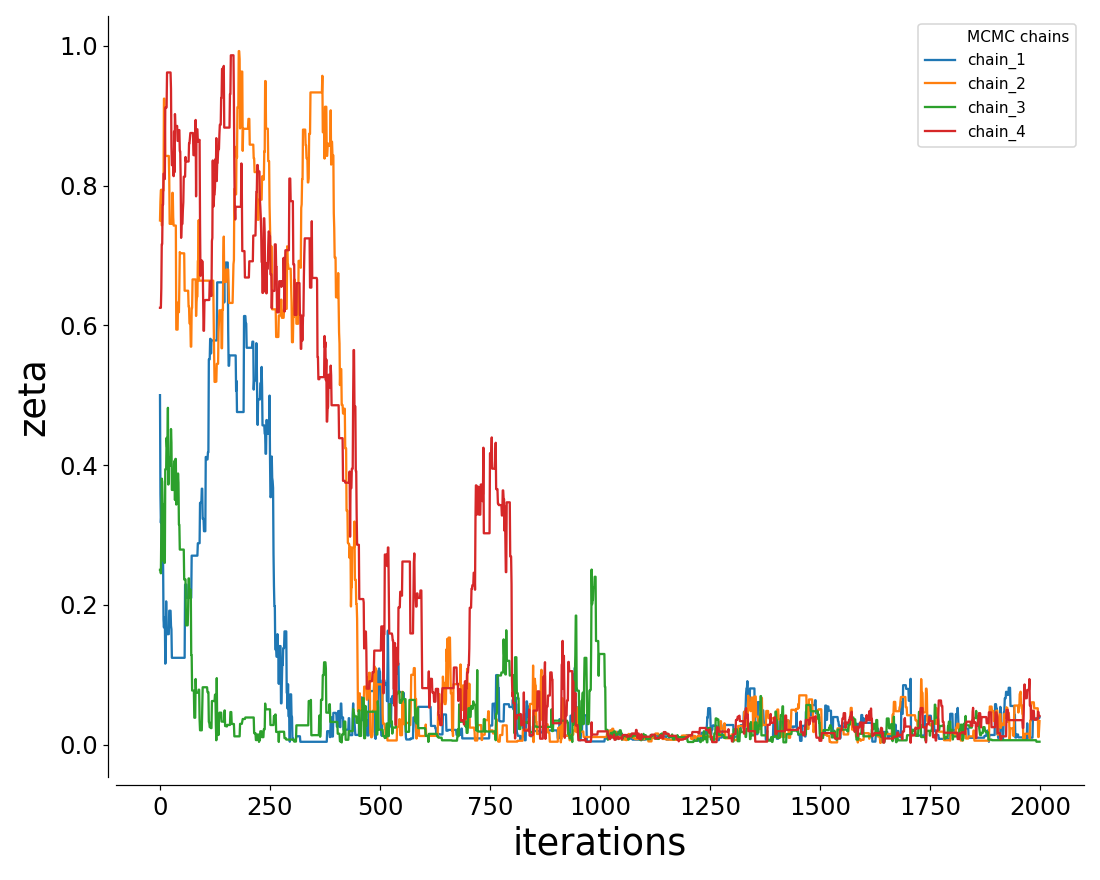

In [78]:
visualize_fitting(param_wh, 2, 'zeta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/White_zeta')

<IPython.core.display.Javascript object>


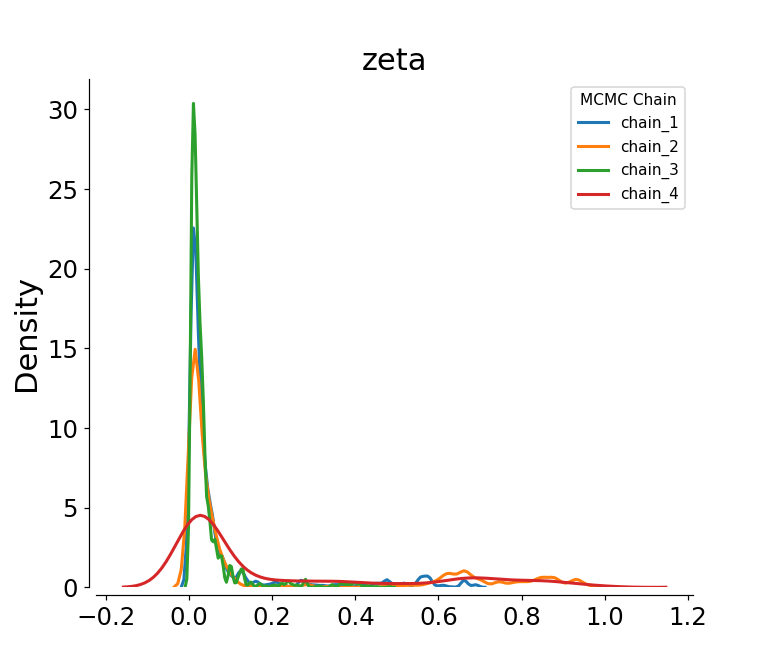

In [60]:
visualize_density(param_wh, 2, 'zeta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/White_zeta_density')

## noise: none

In [61]:
file_none = open('C:/Users/canlab/Desktop/Modelling_Influenca/Results/noise_none_agentid_0.pkl', 'rb')
none = pickle.load(file_none)
param_none = none[0] #shape: (2000, 4, 3)
lkd_none = none[1]
mrglkd_none = none[2] 
inference_validated_none = none[3]
file_none.close()

iterations    999.500000
chain_1         0.165665
chain_2         0.172606
chain_3         0.169803
chain_4         0.166947
dtype: float64


<IPython.core.display.Javascript object>


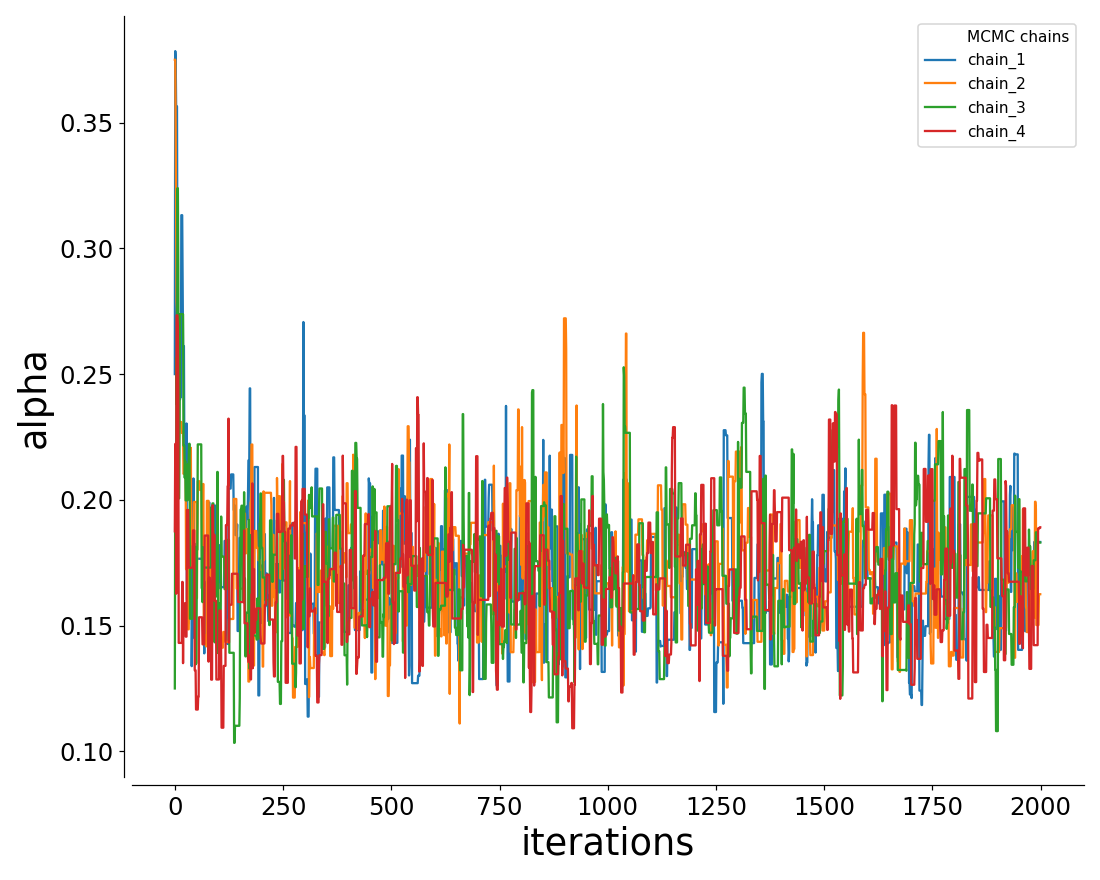

In [79]:
visualize_fitting(param_none, 0, 'alpha', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/none_alpha')

<IPython.core.display.Javascript object>


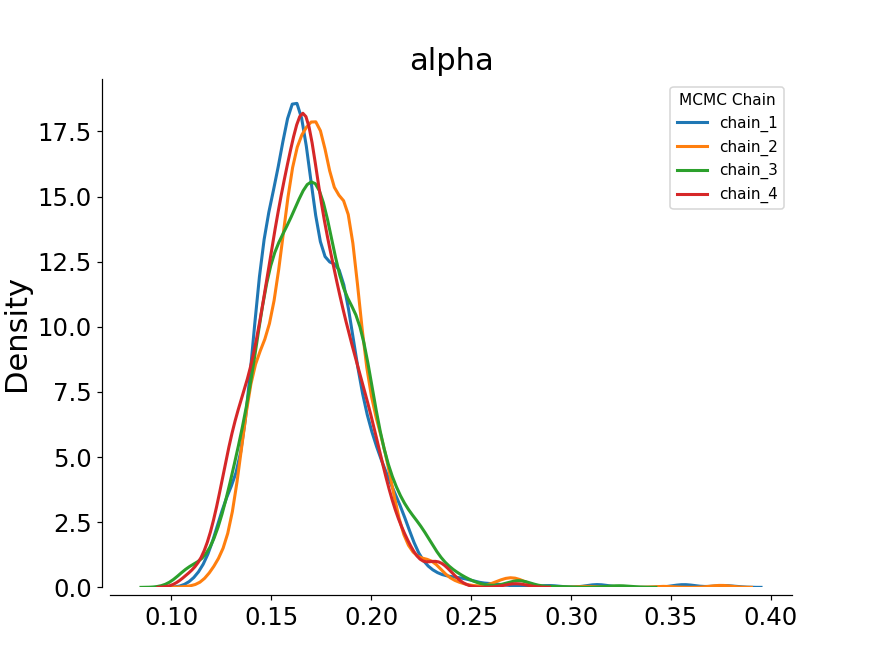

In [64]:
visualize_density(param_none, 0, 'alpha', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/none_alpha_density')

iterations    999.500000
chain_1         0.159323
chain_2         0.156260
chain_3         0.163886
chain_4         0.158546
dtype: float64


<IPython.core.display.Javascript object>


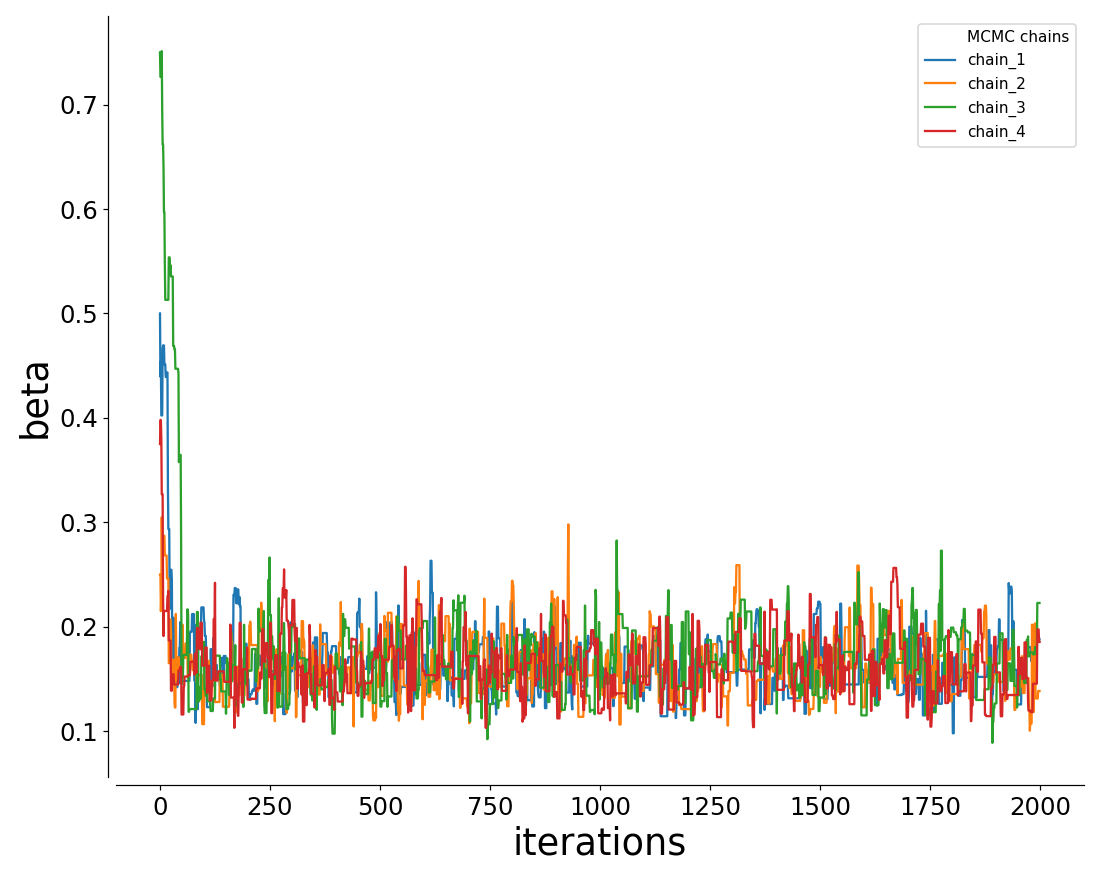

In [80]:
visualize_fitting(param_none, 1, 'beta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/none_beta')

<IPython.core.display.Javascript object>


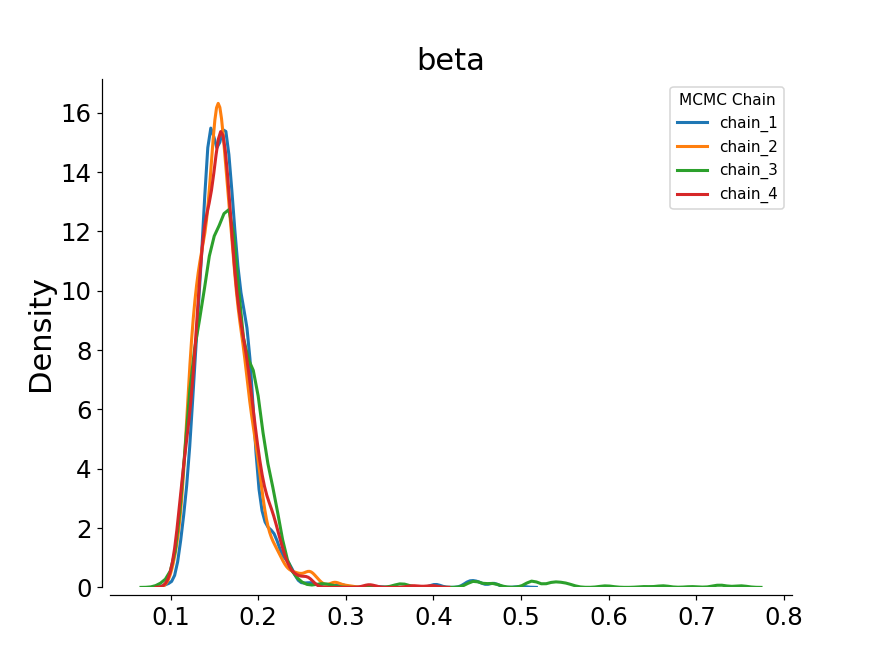

In [65]:
visualize_density(param_none, 1, 'beta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/none_beta_density')

iterations    999.500000
chain_1         0.776451
chain_2         0.773576
chain_3         0.934652
chain_4         0.892523
dtype: float64


<IPython.core.display.Javascript object>


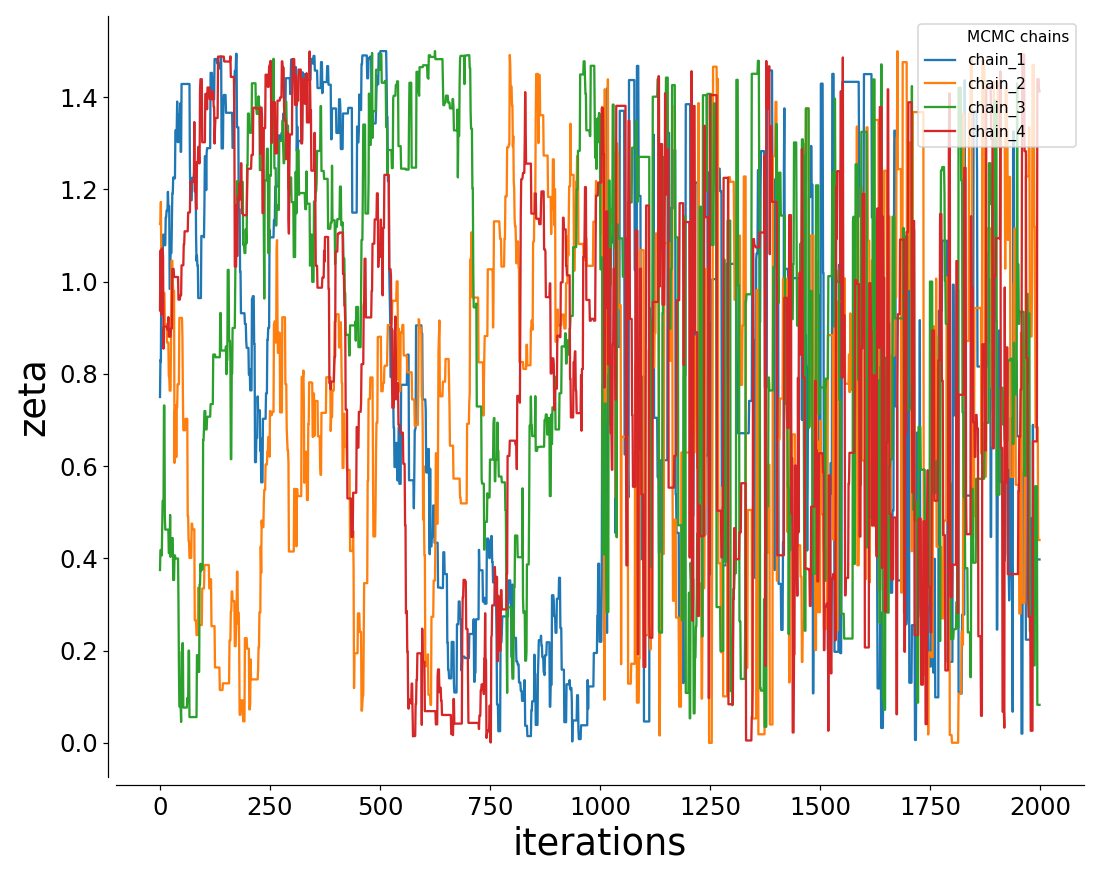

In [81]:
visualize_fitting(param_none, 2, 'zeta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/none_zeta')

<IPython.core.display.Javascript object>


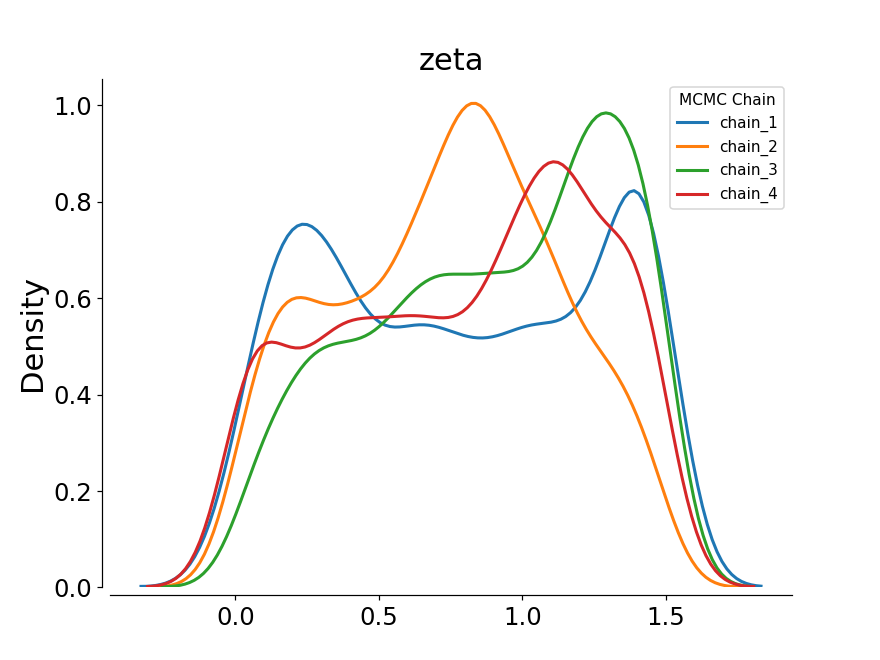

In [69]:
visualize_density(param_none, 2, 'zeta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/none_zeta_density')